In [1]:
# Preamble 
try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, join

## 2 Data

### 2.1 Young/Old Disk from Nissen et al. (2020)

In [2]:
# Read in data on Solar-like stars from Nissen et al. (2020): https://ui.adsabs.harvard.edu/abs/2020A&A...640A..81N
nissen_solar1 = Table.read('data/Nissen2020_AA_640_81.fits',1)
nissen_solar2 = Table.read('data/Nissen2020_AA_640_81.fits',2)
nissen_solar = join(nissen_solar1, nissen_solar2, keys='HD',metadata_conflicts='silent')

# For visualisation: also use age clipped to 13.8 Gyr
nissen_solar['age_clip'] = nissen_solar['Age'].clip(min=0.0, max=13.8)
nissen_solar['e_age_clip'] = nissen_solar['e_Age']

# Calculate [X/H] as well as sigma([X/Fe]) and sigma([X/H])
for element in ['Fe','C','O','Na','Mg','Al','Si','Ca','Ti','Cr','Ni','Sr','Y']:

    # Define placeholders
    if element != 'Fe':
        nissen_solar['__'+element+'_H_'] = nissen_solar['__'+element+'_Fe_'] + nissen_solar['__Fe_H_']
        nissen_solar['e___'+element+'_Fe_'] = np.ones(len(nissen_solar['__'+element+'_Fe_']))

    # Groups of uncertainties based on Nissen et al. (2020) Table 3
    subsolar   = nissen_solar['__Fe_H_'] < -0.1
    solar      = abs(nissen_solar['__Fe_H_']) <= 0.1
    supersolar = nissen_solar['__Fe_H_'] > 0.1
    if element == 'Fe': sub,sol,sup = 0.009,0.006,0.010
    if element == 'C' : sub,sol,sup = 0.016,0.013,0.024
    if element == 'O' : sub,sol,sup = 0.030,0.022,0.030
    if element == 'Na': sub,sol,sup = 0.007,0.007,0.007
    if element == 'Mg': sub,sol,sup = 0.014,0.011,0.014
    if element == 'Al': sub,sol,sup = 0.008,0.008,0.010
    if element == 'Si': sub,sol,sup = 0.007,0.007,0.008
    if element == 'Ca': sub,sol,sup = 0.006,0.006,0.006
    if element == 'Ti': sub,sol,sup = 0.007,0.007,0.009
    if element == 'Cr': sub,sol,sup = 0.006,0.006,0.007
    if element == 'Ni': sub,sol,sup = 0.006,0.006,0.006
    if element == 'Sr': sub,sol,sup = 0.016,0.012,0.027
    if element == 'Y' : sub,sol,sup = 0.013,0.010,0.013

    # sigma([X/H])
    nissen_solar['e___'+element+'_H_'] = np.ones(len(nissen_solar['__'+element+'_H_']))
    nissen_solar['e___'+element+'_H_'][subsolar] = sub
    nissen_solar['e___'+element+'_H_'][solar] = sol
    nissen_solar['e___'+element+'_H_'][supersolar] = sup
    
    # sigma([X/Fe]) except for [Fe/Fe]
    if element != 'Fe':
        nissen_solar['e___'+element+'_Fe_'][subsolar] = sub
        nissen_solar['e___'+element+'_Fe_'][solar] = sol
        nissen_solar['e___'+element+'_Fe_'][supersolar] = sup
        
# Select the different groups:
nissen_solar_old = nissen_solar['Age'] > 5.5 - 5*nissen_solar['__Fe_H_']
nissen_solar_young = (nissen_solar['Age'] < 4.5 - 5*nissen_solar['__Fe_H_']) & (nissen_solar['__Fe_H_'] < 0.2)
nissen_solar_rest = (~nissen_solar_old) & (~nissen_solar_young)

### 2.2 Halo and old disk from Nissen & Schuster (2010,2011) and Schuster et al. (2012)

In [3]:
# Follow-up publications of the same set of stars.

# Data from Nissen & Schuster (2010): http://adsabs.harvard.edu/abs/2010A%26A...511L..10N
# Na, Mg, Si, Ca, Ti, Cr, Ni
nissen_schuster_chemistry1 = Table.read('data/Nissen2010_AA_511_10.fits',2)

# Data from Nissen & Schuster (2011): http://adsabs.harvard.edu/abs/2011A%26A...530A..15N
# Mn, Cu, Zn, Y, Ba
nissen_schuster_chemistry2 = Table.read('data/Nissen2011_AA_530_15.fits',1)
nissen_schuster_chemistry2 = nissen_schuster_chemistry2[['Name','__Mn_Fe_','__Cu_Fe_','__Zn_Fe_','__Y_Fe_','__Ba_Fe_']]

# C, O
nissen_schuster_chemistry3 = Table.read('data/Nissen2014_AA_568_25.fits',2)
nissen_schuster_chemistry3 = nissen_schuster_chemistry3[['Name','__C_H_','__O_H_3n']]
nissen_schuster_chemistry3.rename_column('__O_H_3n','__O_H_')

# Data from Schuster et all. (2012): http://adsabs.harvard.edu/abs/2012A%26A...538A..21S
nissen_schuster_ages = Table.read('data/Schuster2012_AA_538_21_Table4_Ages.fits',1)

# Join Catalogues and Rename
nissen_schuster_chemistry = join(nissen_schuster_chemistry1, nissen_schuster_chemistry2, keys = 'Name', metadata_conflicts='silent')
nissen_schuster_chemistry = join(nissen_schuster_chemistry, nissen_schuster_chemistry3, keys = 'Name', metadata_conflicts='silent')
for element in ['Na','Mg','Si','Ca','Ti','Cr','Ni','Mn','Cu','Zn','Y','Ba']:
    nissen_schuster_chemistry['__'+element+'_H_'] = nissen_schuster_chemistry['__'+element+'_Fe_'] + nissen_schuster_chemistry['__Fe_H_']
for element in ['C','O']:
    nissen_schuster_chemistry['__'+element+'_Fe_'] = nissen_schuster_chemistry['__'+element+'_H_'] - nissen_schuster_chemistry['__Fe_H_']
nissen_schuster = join(nissen_schuster_chemistry, nissen_schuster_ages, keys = 'Name', metadata_conflicts='silent')

# For visualisation: also use age clipped to 13.8 Gyr
nissen_schuster['age_clip'] = nissen_schuster['age'].clip(min=0.0, max=13.8)
nissen_schuster['e_age_clip'] = nissen_schuster['sigma_age']

# Calculate [X/H] as well as sigma([X/Fe]) and sigma([X/H])
for element in ['Fe','C','O','Na','Mg','Si','Ca','Ti','Cr','Ni','Mn','Cu','Zn','Y','Ba']:

    # See Section 3 from Nissen & Schuster (2010)
    if element in ['Fe','Na','Mg','Si']: error = 0.04 # 0.03-0.04
    if element in ['Ca','Ti','Cr']: error = 0.02 
    if element in ['Ni']: error = 0.01
    # See Section 2.7 from Nissen & Schuster (2011)
    if element in ['Mn']: error = 0.025
    if element in ['Cu','Zn','Y','Ba']: error = 0.035
    # See Tables 6 and 7 from Nissen et al. (2014)
    if element in ['C']: error = 0.054
    if element in ['O']: error = 0.055

    nissen_schuster['e___'+element+'_H_'] = error * np.ones(len(nissen_schuster['__Fe_H_']))
    nissen_schuster['e___'+element+'_Fe_'] = error * np.ones(len(nissen_schuster['__Fe_H_']))

# Select different groups
nissen_schuster_gse = (nissen_schuster['Class']=='low-alpha') & (nissen_schuster['__Na_Fe_'] < 0.0) & (nissen_schuster['age'] > 8)
nissen_schuster_highalpha = (nissen_schuster['Class']=='high-alpha') & (nissen_schuster['age']>7)
nissen_schuster_td = nissen_schuster['Class']=='TD'
nissen_schuster_rest = ((nissen_schuster['Class']=='low-alpha') & (~nissen_schuster_gse)) | ((nissen_schuster['Class']=='high-alpha') & (nissen_schuster['age']<7))

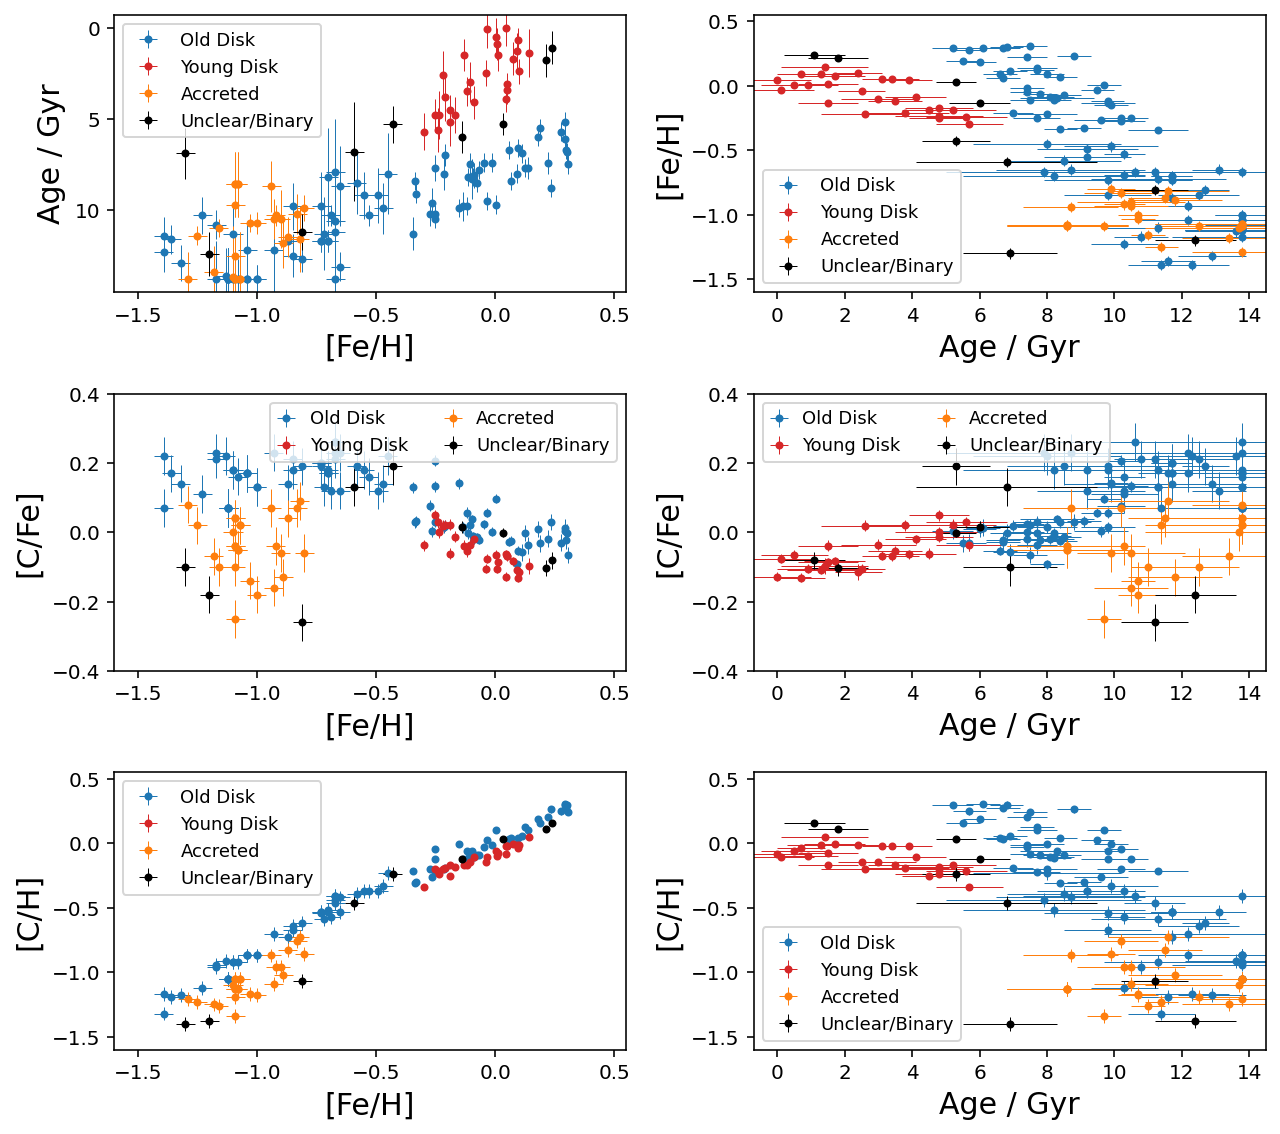

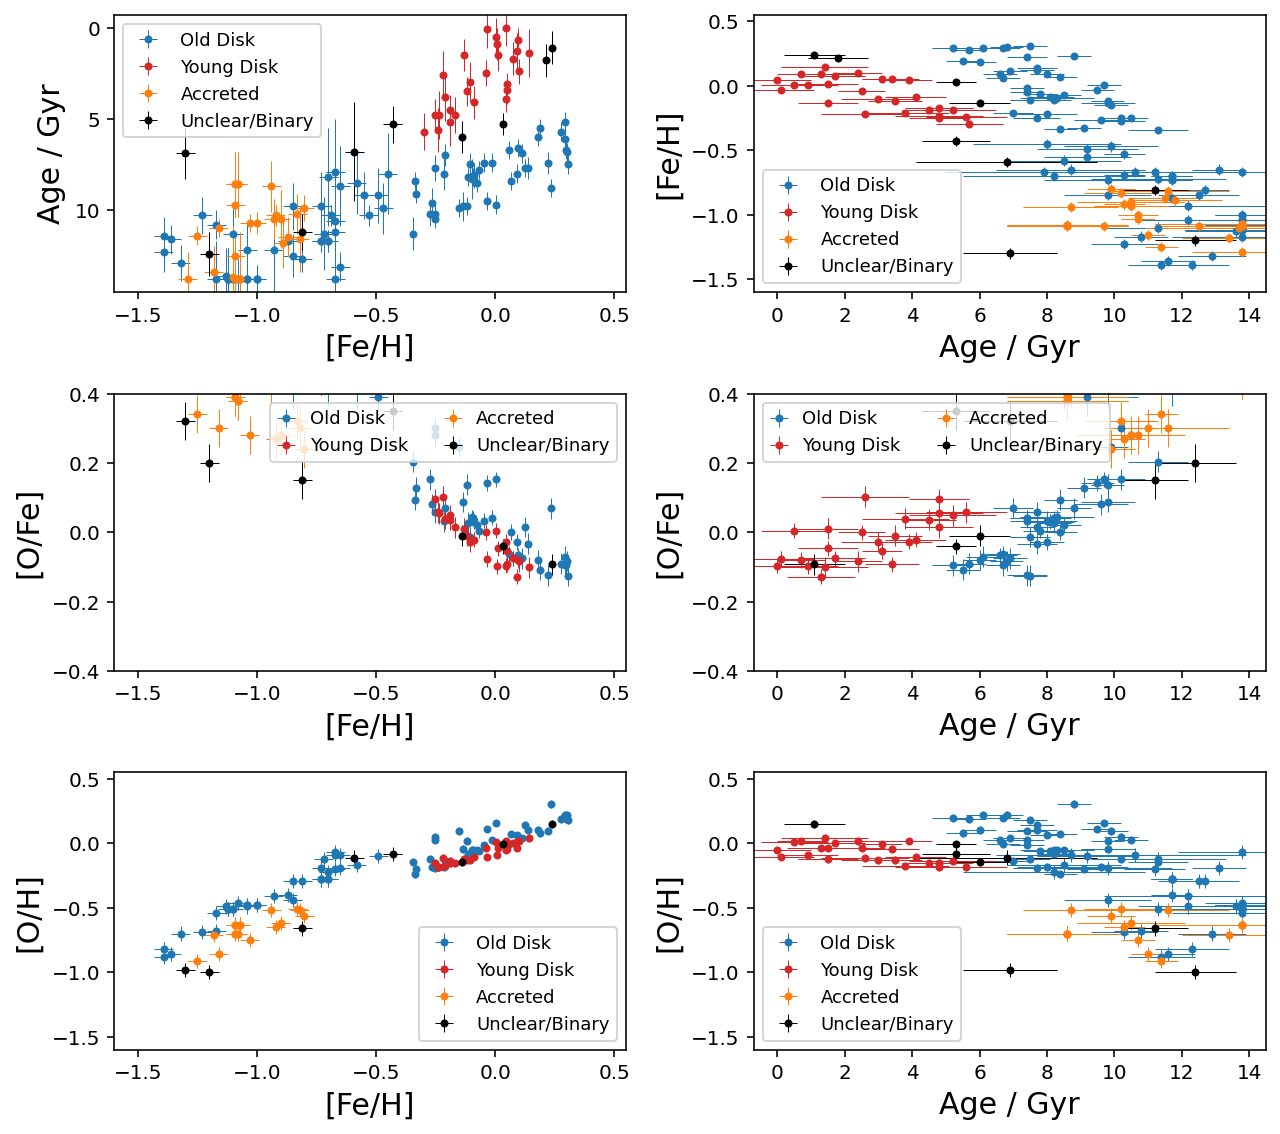

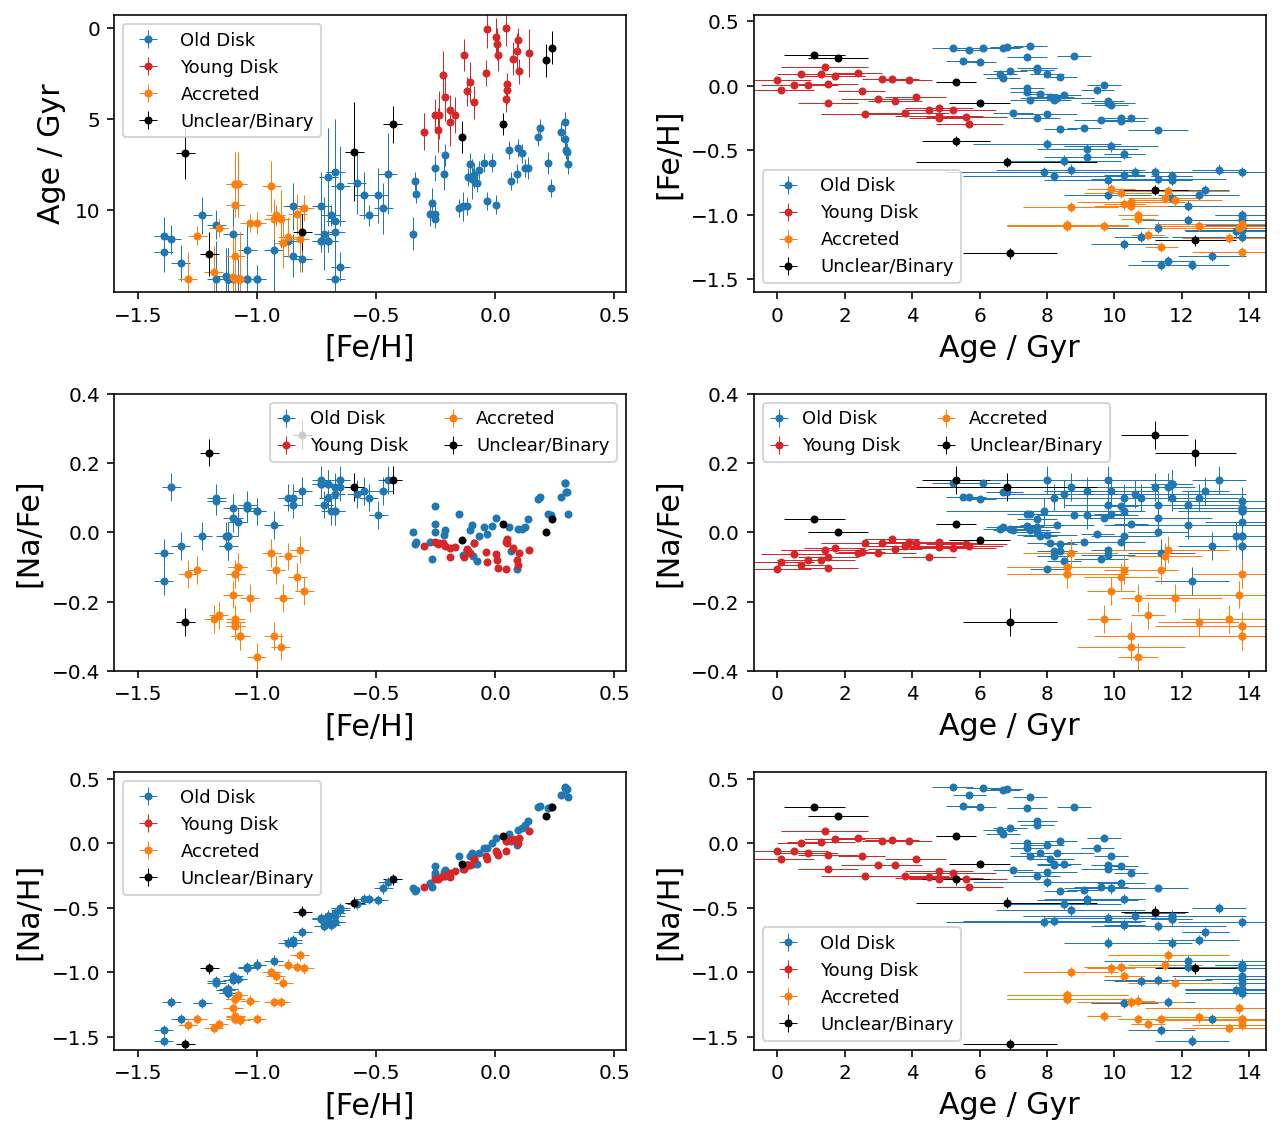

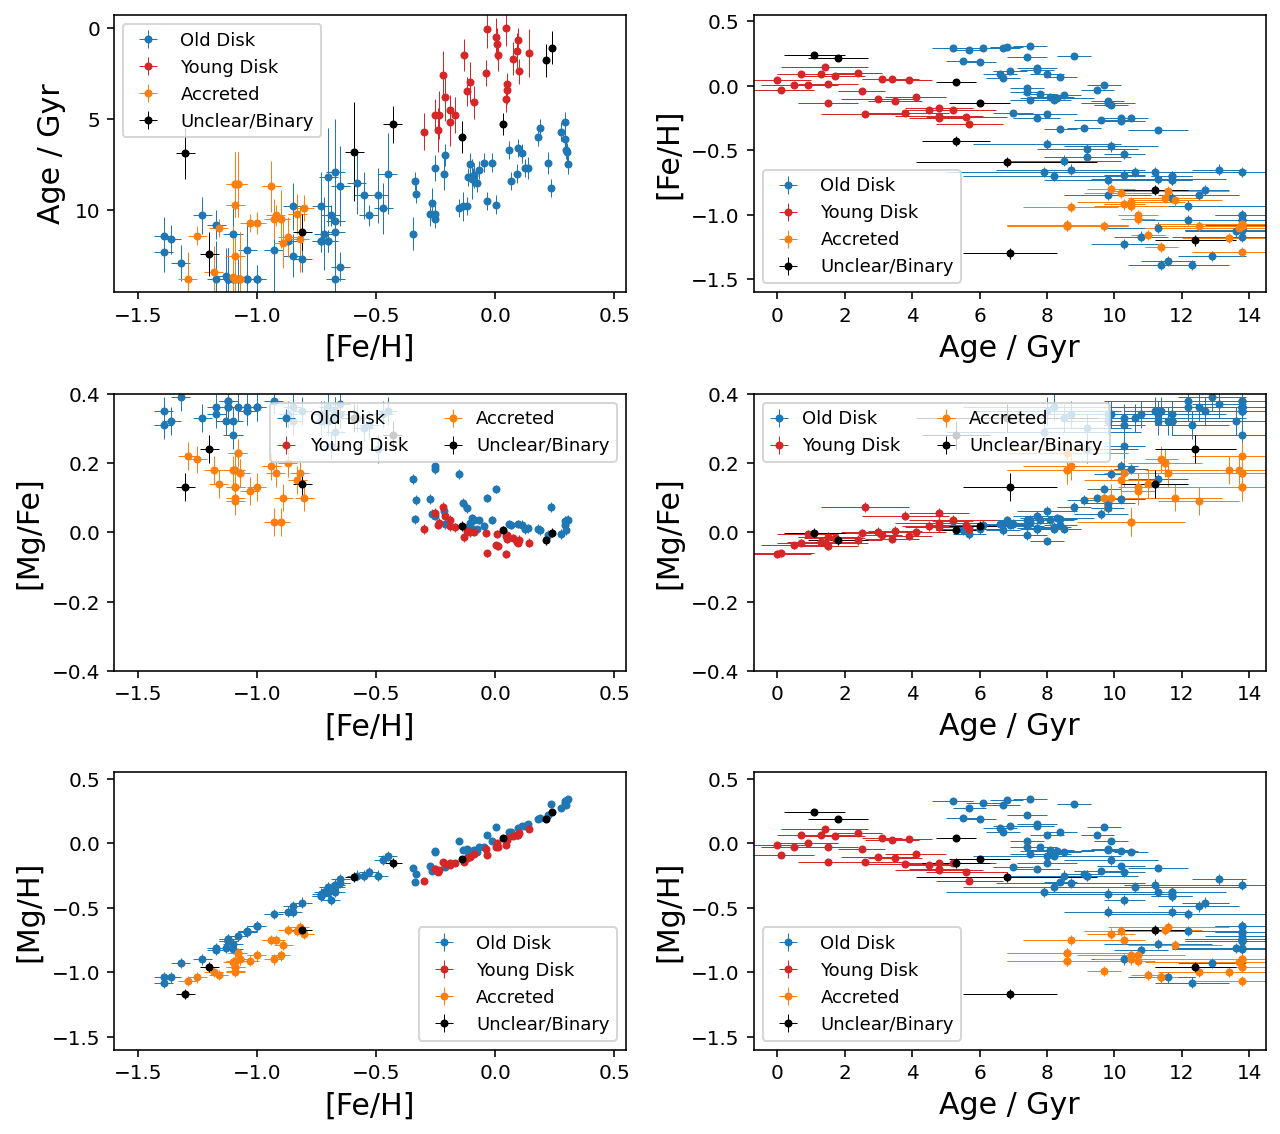

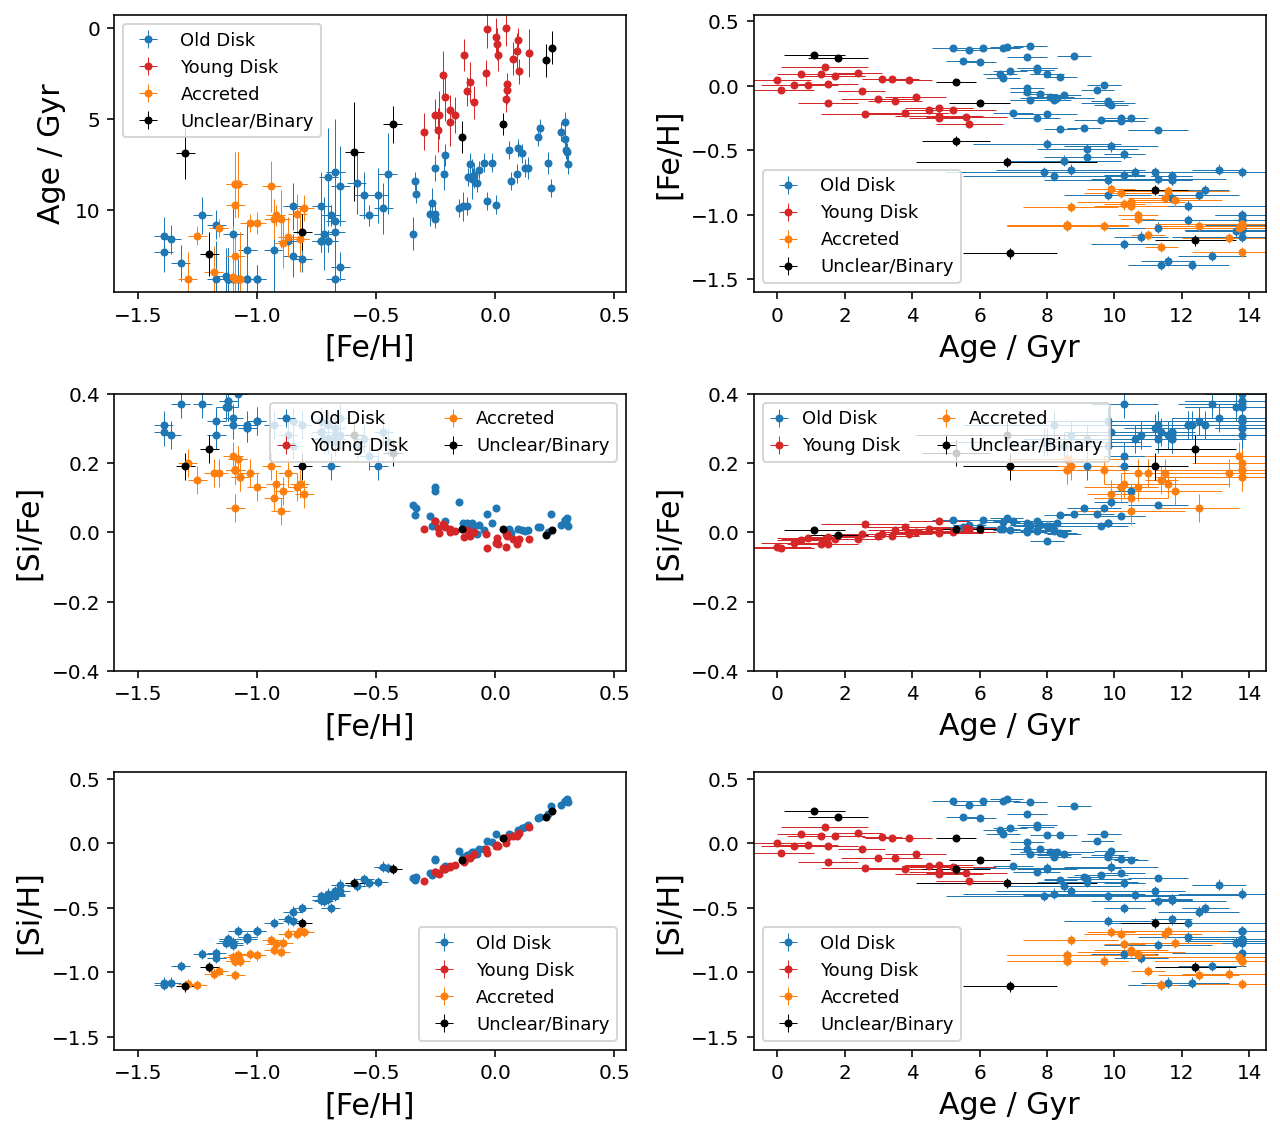

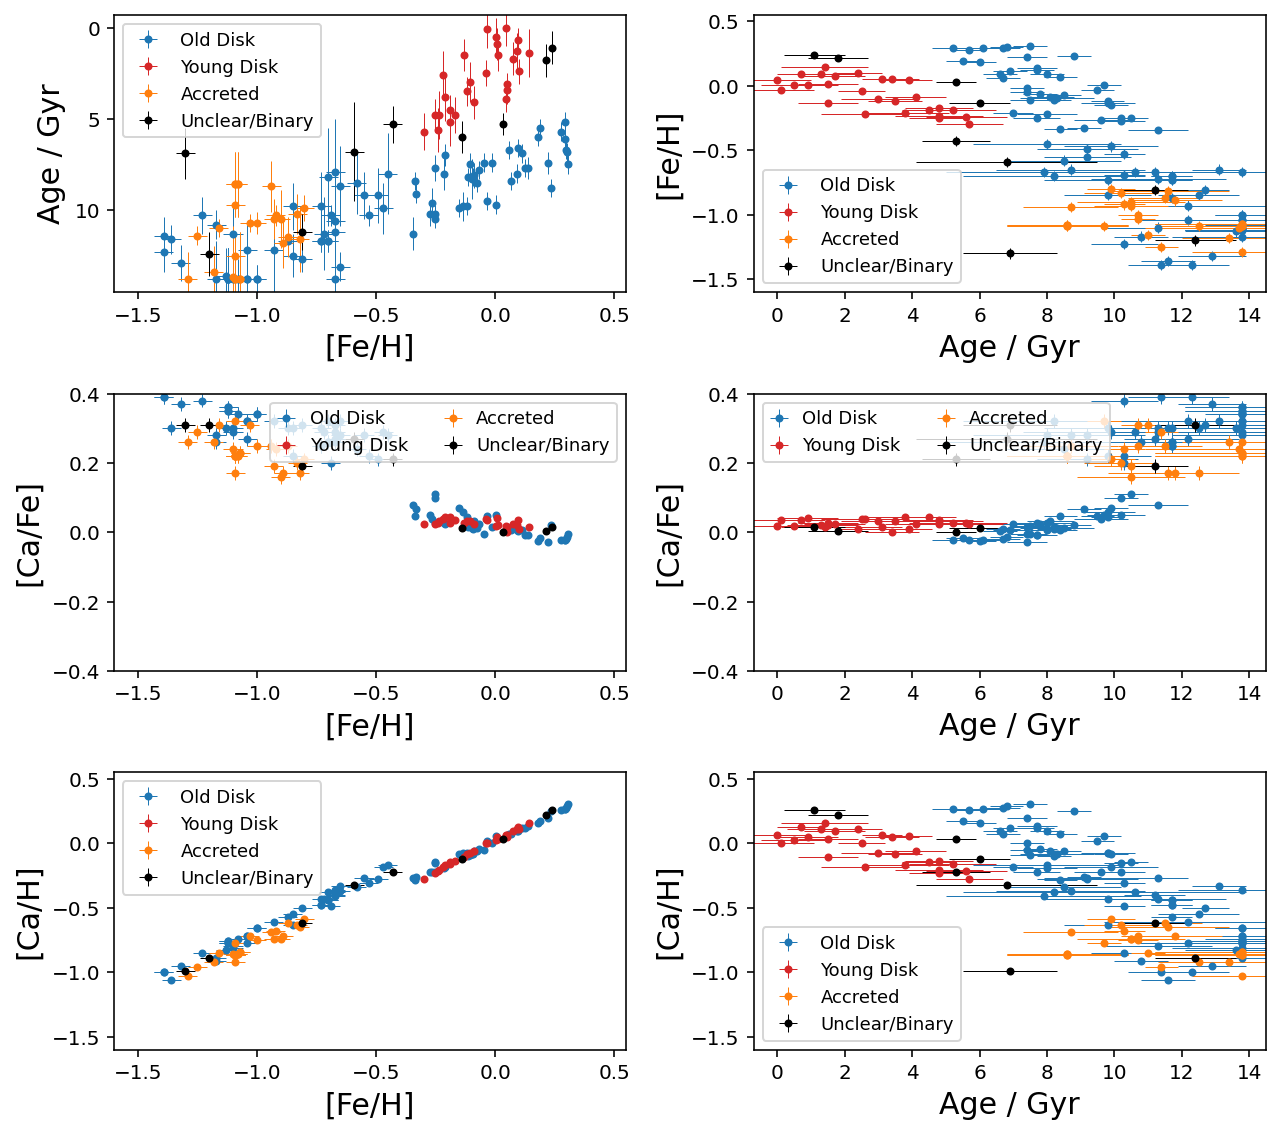

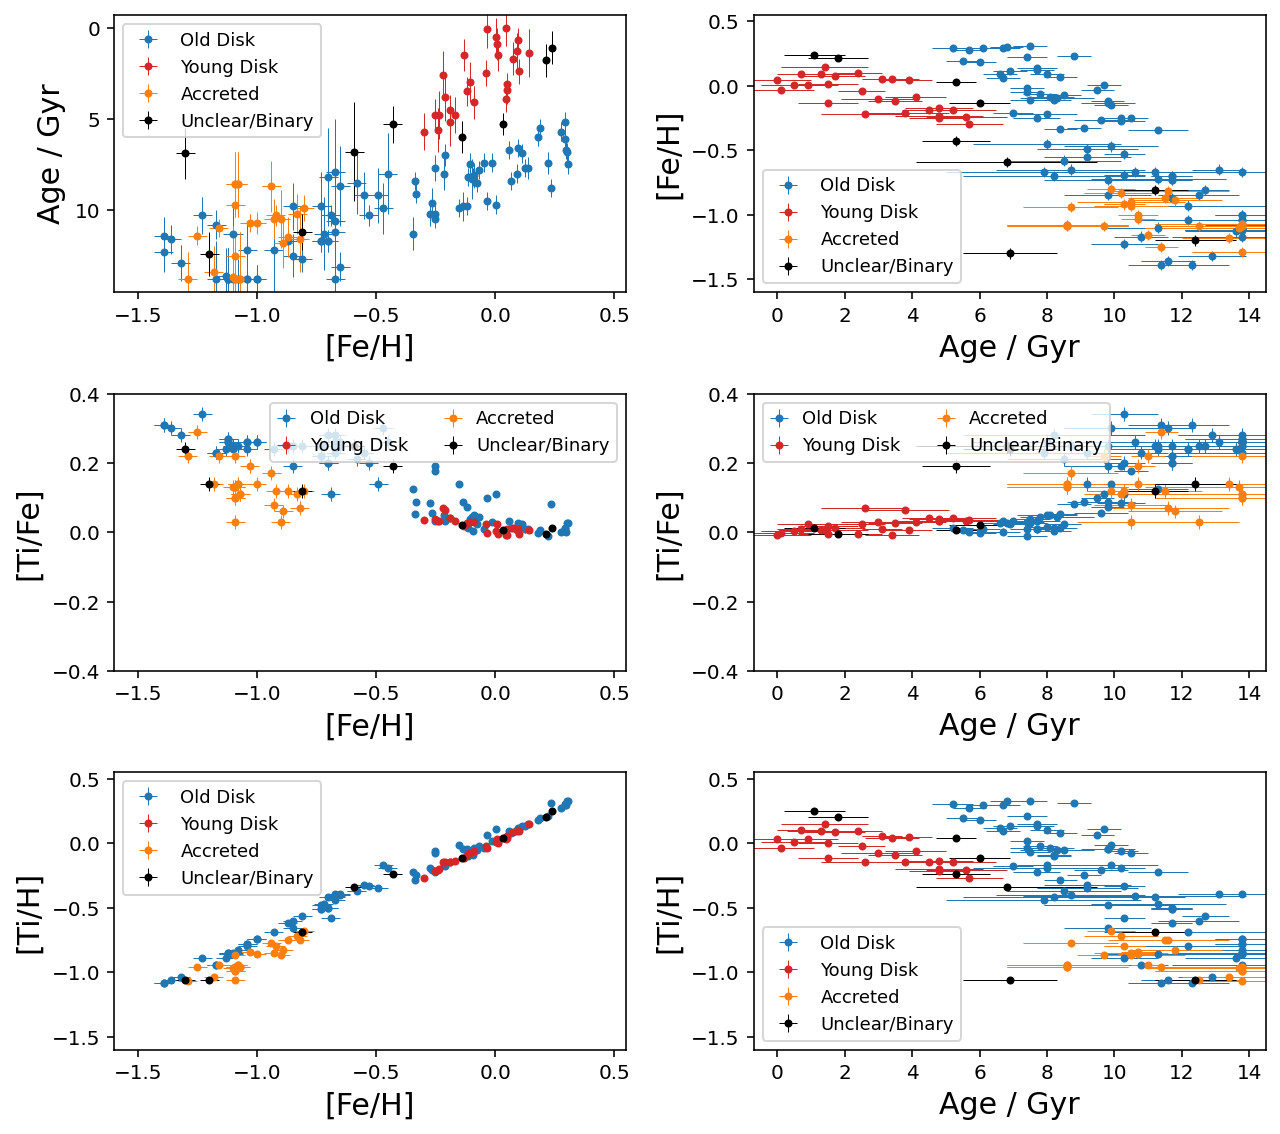

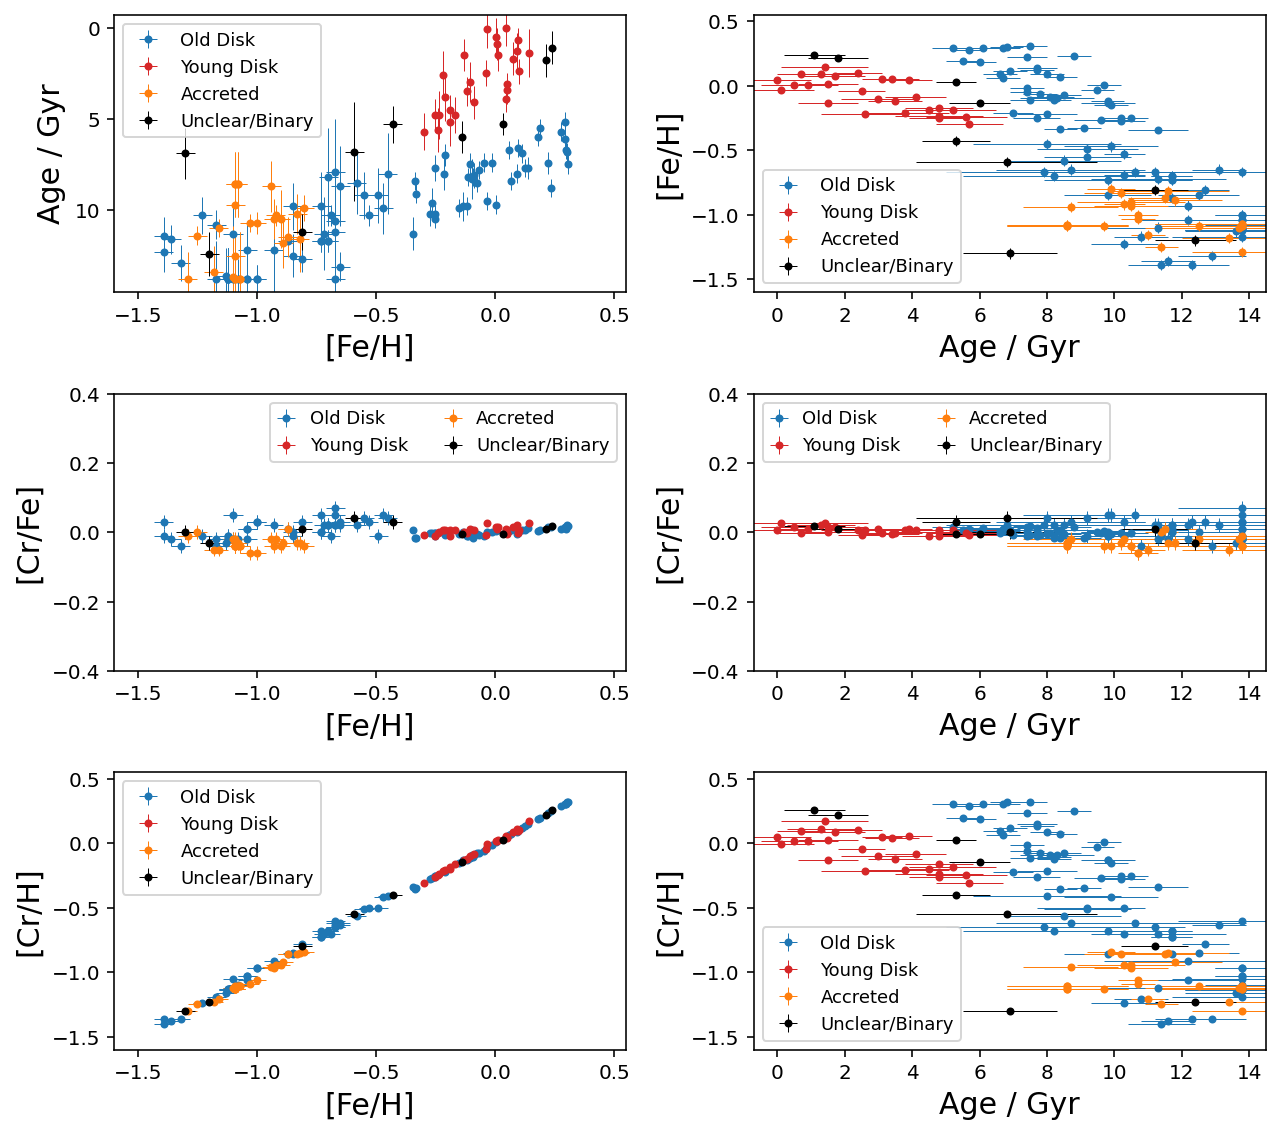

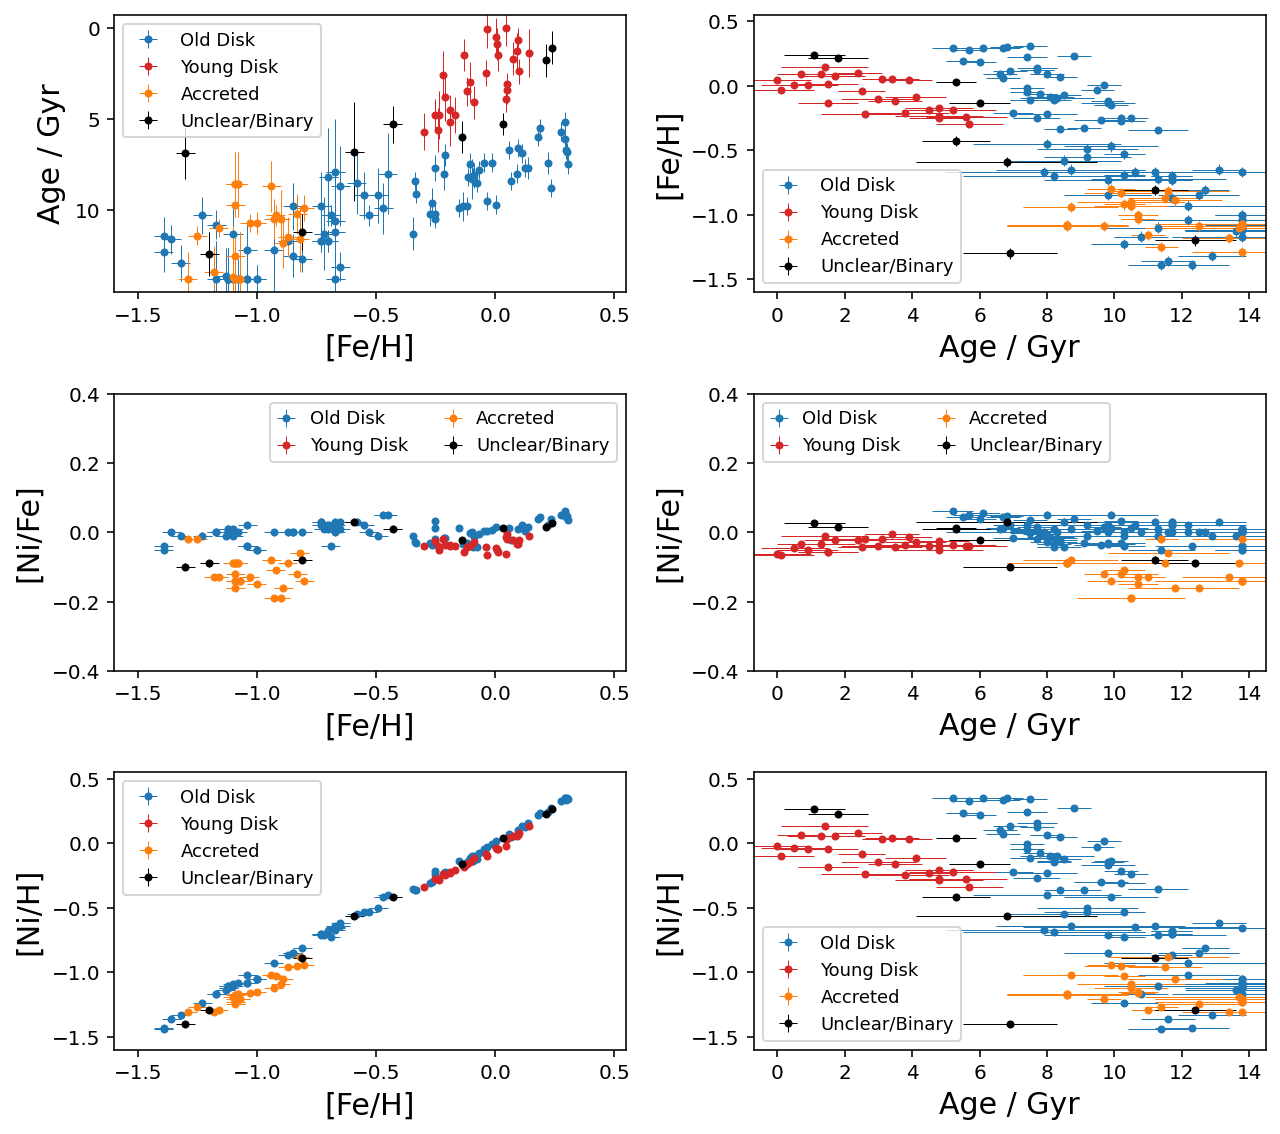

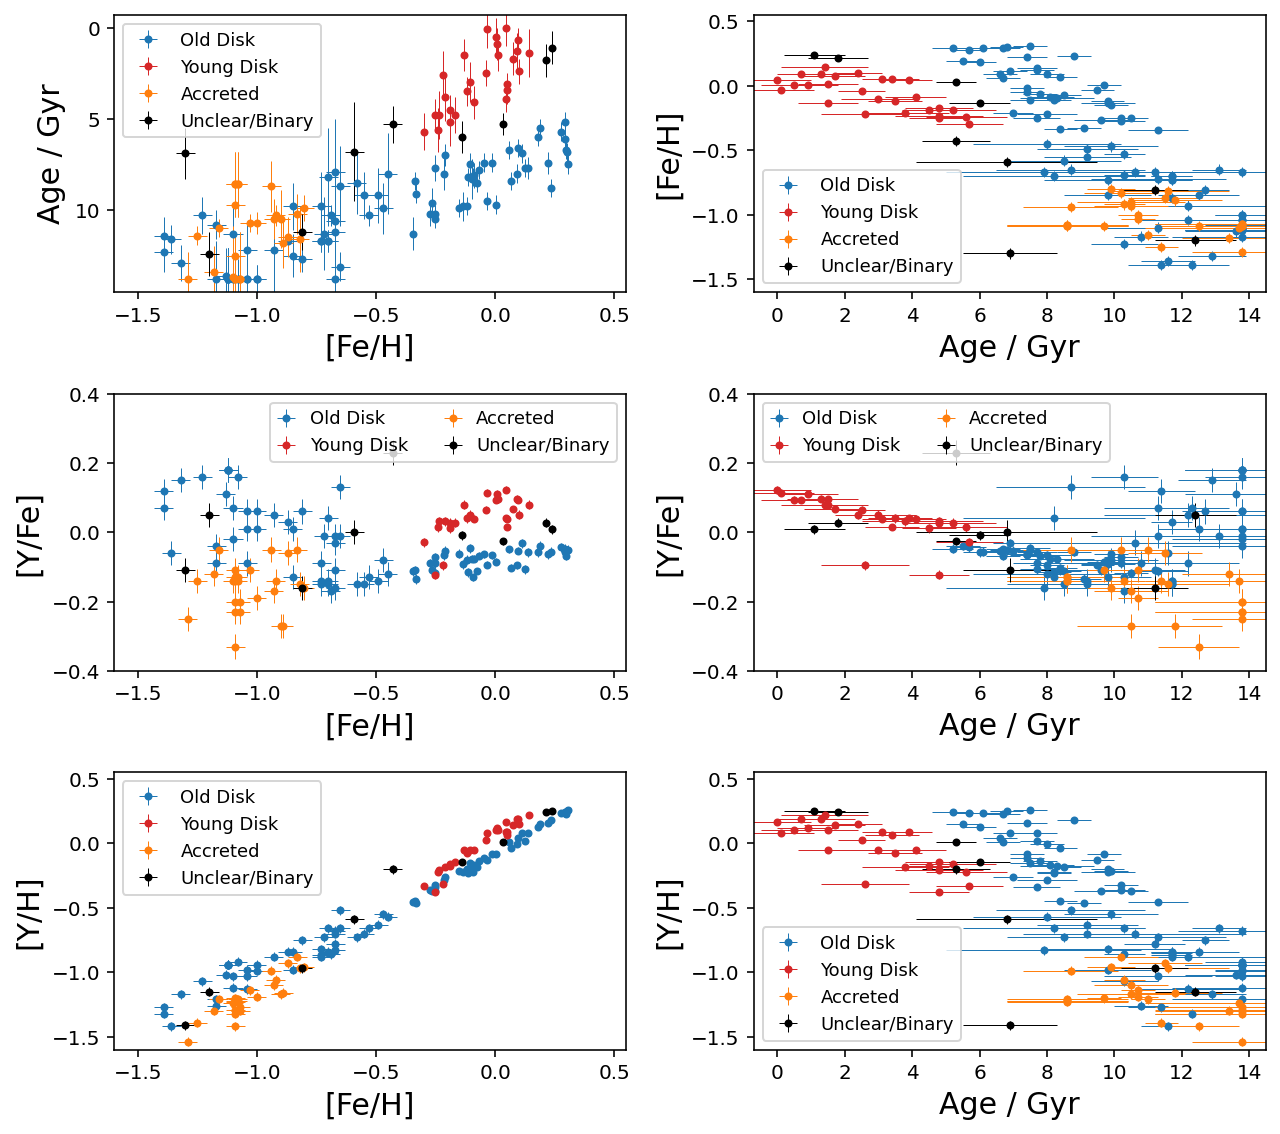

In [4]:
def plot_age_fe_element(elements = ['C','O','Na','Mg','Si','Ca','Ti','Cr','Ni','Y'], save = True):
    
    for x_element in elements:

        f, gs = plt.subplots(3,2,figsize=(9,8))
        gs = gs.flatten()

        x_keys = ['__Fe_H_','age_clip','__Fe_H_','age_clip','__Fe_H_','age_clip']
        x_labels = ['[Fe/H]','Age / Gyr','[Fe/H]','Age / Gyr','[Fe/H]','Age / Gyr']
        y_keys = ['age_clip', '__Fe_H_','__'+x_element+'_Fe_','__'+x_element+'_Fe_','__'+x_element+'_H_','__'+x_element+'_H_']
        y_labels = ['Age / Gyr','[Fe/H]','['+x_element+'/Fe]','['+x_element+'/Fe]','['+x_element+'/H]','['+x_element+'/H]']

        for index, (x_key, x_label, y_key, y_label) in enumerate(zip(x_keys, x_labels, y_keys, y_labels)):
            ax = gs[index]
            #if index in [4,5]:
            ax.set_xlabel(x_label,fontsize=15)
            ax.set_ylabel(y_label, fontsize=15)
            if x_key == 'age_clip':
                ax.set_xlim(-0.7,14.5)
                vice_x_key = 'age'
            if y_key == 'age_clip':
                ax.set_ylim(14.5,-0.7)
                vice_y_key = 'age'
            if x_key == '__Fe_H_':
                ax.set_xlim(-1.6,0.55)
                vice_x_key = '[fe/h]'
            if y_key == '__Fe_H_':
                ax.set_ylim(-1.6,0.55)
                vice_y_key = '[fe/h]'
            if y_key == '__'+x_element+'_Fe_':
                ax.set_ylim(-0.4,0.4)
                vice_y_key = '['+x_element.lower()+'/fe]'
            if y_key == '__'+x_element+'_H_':
                ax.set_ylim(-1.6,0.55)
                vice_y_key = '['+x_element.lower()+'/h]'

            # Old disk sequence: Old Solar + high-alpha (halo) + Thick Disk (TD)
            ax.errorbar(
                nissen_solar[x_key][nissen_solar_old],
                nissen_solar[y_key][nissen_solar_old],
                xerr = nissen_solar['e_'+x_key][nissen_solar_old],
                yerr = nissen_solar['e_'+y_key][nissen_solar_old],
                fmt='.',lw = 0.5,label ='Old Disk',c = 'C0')
            ax.errorbar(
                nissen_schuster[x_key][nissen_schuster_highalpha],
                nissen_schuster[y_key][nissen_schuster_highalpha],
                xerr = nissen_schuster['e_'+x_key][nissen_schuster_highalpha],
                yerr = nissen_schuster['e_'+y_key][nissen_schuster_highalpha],
                fmt='.',lw = 0.5,c = 'C0')
            ax.errorbar(
                nissen_schuster[x_key][nissen_schuster_td],
                nissen_schuster[y_key][nissen_schuster_td],
                xerr = nissen_schuster['e_'+x_key][nissen_schuster_td],
                yerr = nissen_schuster['e_'+y_key][nissen_schuster_td],
                fmt='.',lw = 0.5,c = 'C0')
            # Young Sequence:
            ax.errorbar(
                nissen_solar[x_key][nissen_solar_young],
                nissen_solar[y_key][nissen_solar_young],
                xerr = nissen_solar['e_'+x_key][nissen_solar_young],
                yerr = nissen_solar['e_'+y_key][nissen_solar_young],
                fmt='.',lw = 0.5,label ='Young Disk',c = 'C3')
            # Low-alpha halo / Accreted
            ax.errorbar(
                nissen_schuster[x_key][nissen_schuster_gse],
                nissen_schuster[y_key][nissen_schuster_gse],
                xerr = nissen_schuster['e_'+x_key][nissen_schuster_gse],
                yerr = nissen_schuster['e_'+y_key][nissen_schuster_gse],
                fmt='.',lw = 0.5,label ='Accreted',c = 'C1')

            # Unclear / Binary
            ax.errorbar(
                nissen_solar[x_key][nissen_solar_rest],
                nissen_solar[y_key][nissen_solar_rest],
                xerr = nissen_solar['e_'+x_key][nissen_solar_rest],
                yerr = nissen_solar['e_'+y_key][nissen_solar_rest],
                fmt='.',lw = 0.5,label ='Unclear/Binary',c = 'k')
            ax.errorbar(
                nissen_schuster[x_key][nissen_schuster_rest],
                nissen_schuster[y_key][nissen_schuster_rest],
                xerr = nissen_schuster['e_'+x_key][nissen_schuster_rest],
                yerr = nissen_schuster['e_'+y_key][nissen_schuster_rest],
                fmt='.',lw = 0.5,c = 'k')

            if index == 2:
                ax.legend(fontsize=9,ncol=2,handlelength=1,loc='upper right')
            elif index == 3:
                ax.legend(fontsize=9,ncol=2,handlelength=1,loc='upper left')
            else:
                ax.legend(fontsize=9)

        plt.tight_layout()
        if save:
            plt.savefig('figures/nissen_gce_'+x_element.lower()+'.pdf',dpi=200,bbox_inches='tight')
        plt.show()
        plt.close()
        
plot_age_fe_element()